Yeast Cells 
Dice Score: self-implemented K means vs sklearn 


##Plot Dice Score / N2DL-HeLa Dataset
#Otsu vs. kmeans vs. Ground Truth

[ WARN:0@281753.355] global loadsave.cpp:268 findDecoder imread_('/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Images/Datenvorbereitung_Images/KMeans/KMeans_t13.tiff'): can't open/read file: check file path/integrity
[ WARN:0@281753.356] global loadsave.cpp:268 findDecoder imread_('/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Images/Datenvorbereitung_Images/KMeans/KMeans_t52.tiff'): can't open/read file: check file path/integrity
[ WARN:0@281753.357] global loadsave.cpp:268 findDecoder imread_('/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Images/Datenvorbereitung_Images/KMeans/KMeans_t75.tiff'): can't open/read file: check file path/integrity
[ WARN:0@281753.359] global loadsave.cpp:268 findDecoder imread_('/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Images/Datenvorbereitung_Images/KMeans/KMeans_t79.tiff'): can't open/read file: check file path/integrity


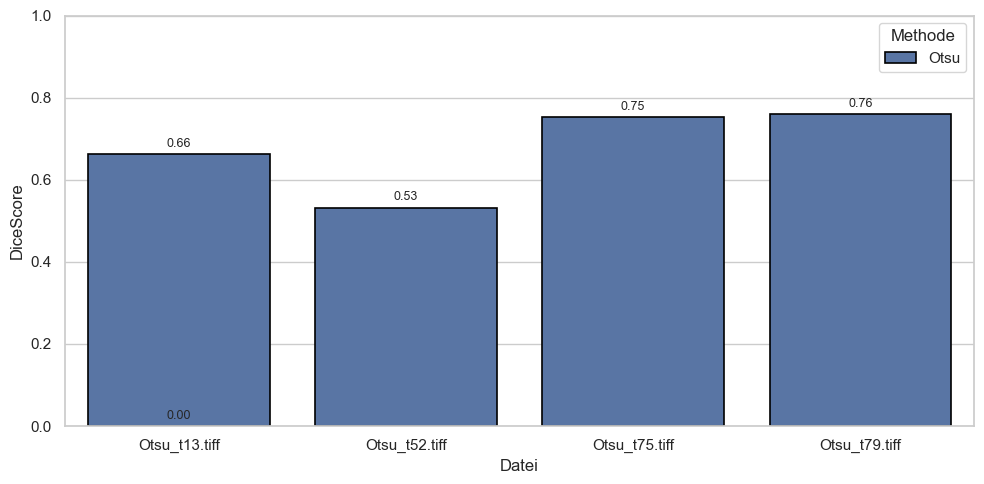

In [43]:
from Functions.Dice_coefficient import dice_coefficient

base_dir = os.getcwd()  # Get the current working directory

methods = {
    "Otsu": os.path.join(base_dir, "Images", "Datenvorbereitung_Images", "Otsu"),       
    "KMeans": os.path.join(base_dir, "Images", "Datenvorbereitung_Images", "KMeans")
}

df = evaluate_segmentation(base_dir, methods) 
plot_dice_scores(df)


                      Bild  DiceScore
0  Otsu_t13_bilateral.tiff   0.640201
1       Otsu_t13_gauß.tiff   0.554465


/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', width=0.4, palette="viridis")


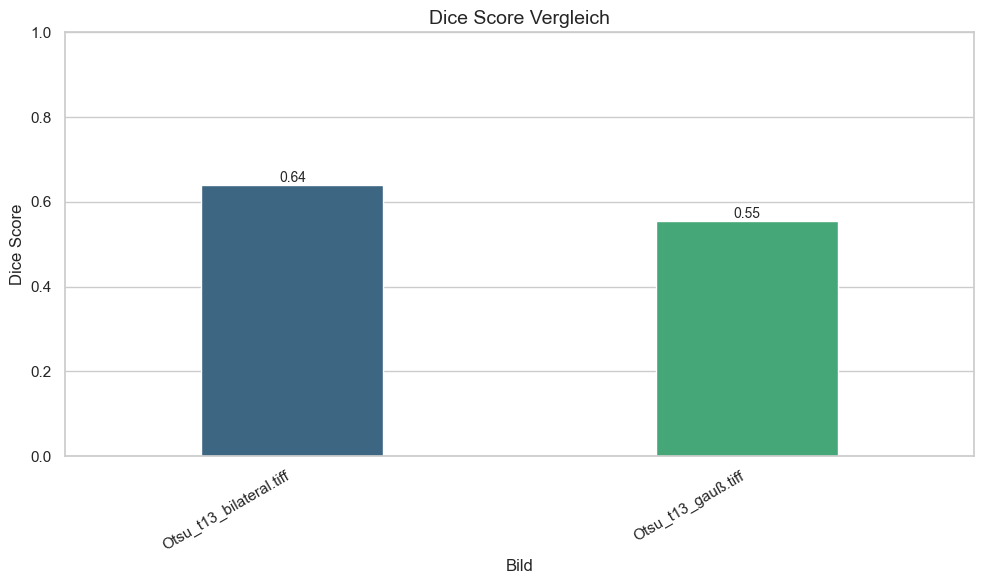

,Bild,DiceScore
0,Otsu_t13_bilateral.tiff,0.640201
1,Otsu_t13_gauß.tiff,0.554465


In [2]:
from Functions.Dice_coefficient import evaluate_and_plot_dice

image_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_bilateral.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_gauß.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
]

evaluate_and_plot_dice(image_pairs)

